#### Baby Name Popularity

In [1]:
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
color_pal = sns.color_palette()

In [2]:
name_files = glob('/home/n-3331/Documents/Datasets/Babay_Names/names/*.txt')

In [3]:
dfs = []
for f in name_files:
    df = pd.read_csv(f, names=['Name','Sex','Count'])
    df['Year'] = int(f[-8:-4])
    dfs.append(df)
df = pd.concat(dfs)

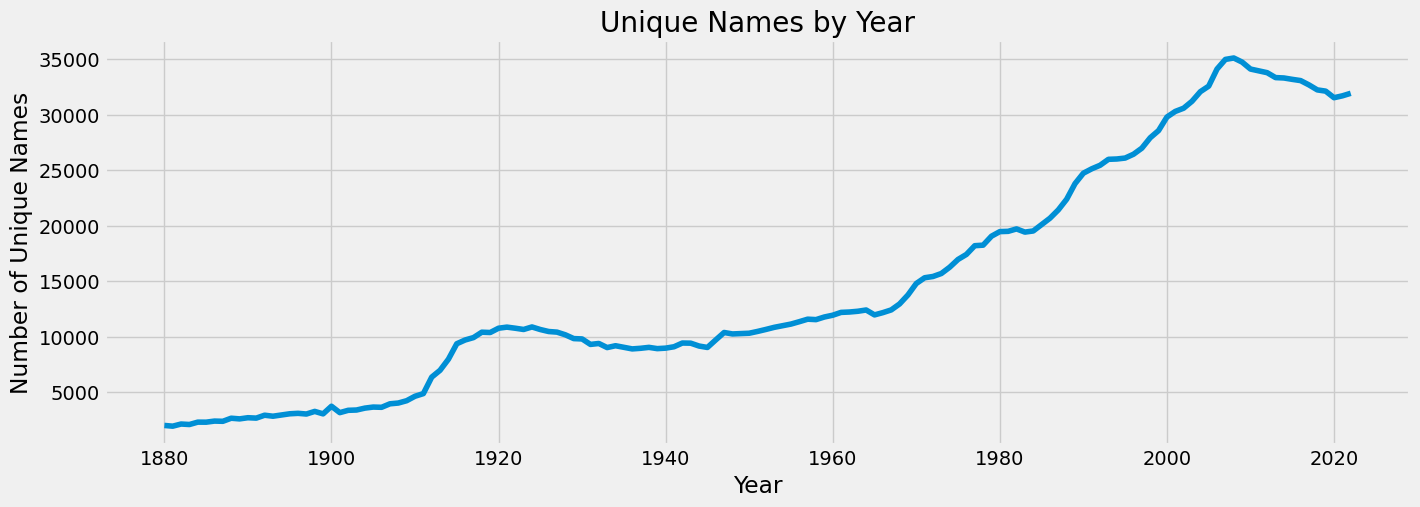

In [4]:
ax = df['Year'].value_counts().sort_index().plot(figsize=(15,5), title='Unique Names by Year')
ax.set_ylabel('Number of Unique Names')
plt.show()

In [5]:
df.to_csv('/home/n-3331/Documents/Datasets/Babay_Names/names/names.csv',index=False)

In [6]:
def plot_name(df, name, genders=['F', 'M']):
    
    fig, ax = plt.subplots(figsize=(15,5))
    gender1 = genders[0]
    df.query('Name == @name and Sex == @gender1').set_index('Year').sort_index().plot(figsize=(15,5), ax=ax)

    ax.set_title(f'Popularity of The Name: {name}')
    ax.legend().remove()

    if len(genders) == 2:
        ax2 = ax.twinx()
        gender2 = genders[1]
        df.query('Name == @name and Sex == @gender2').set_index('Year').sort_index().plot(figsize=(15,5), ax=ax2, color=color_pal[1])
        ax2.legend().remove()
    fig.legend(genders)
    plt.show()

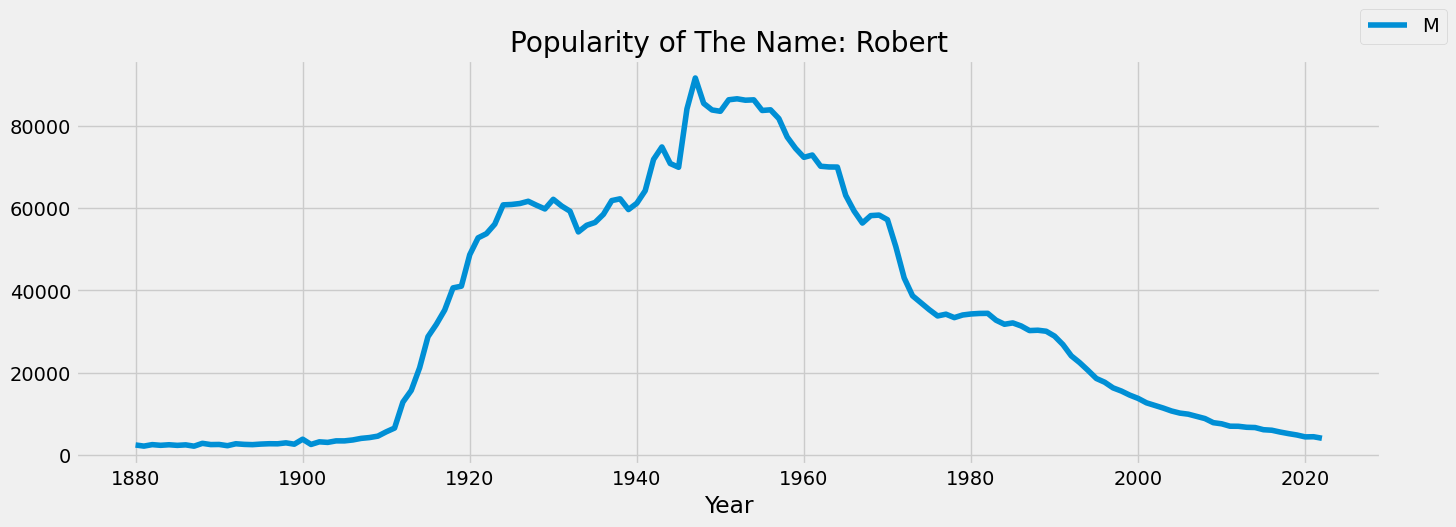

In [7]:
plot_name(df, 'Robert', genders=['M'])

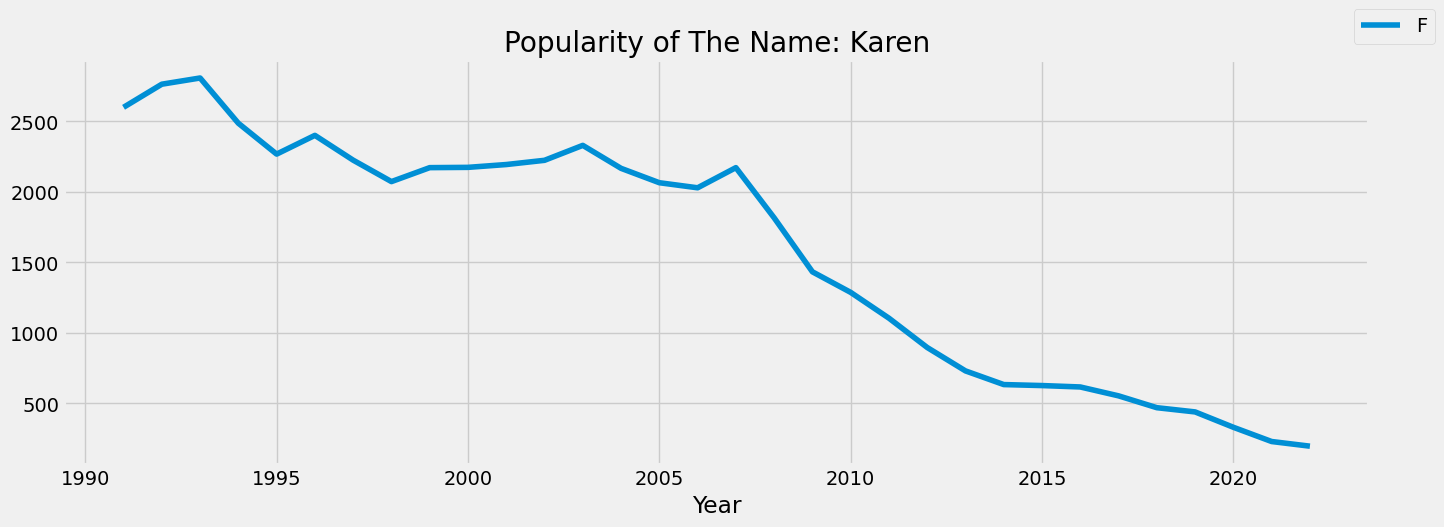

In [8]:
plot_name(df.query('Sex == "F" and Year > 1990'), "Karen", genders = ['F'])

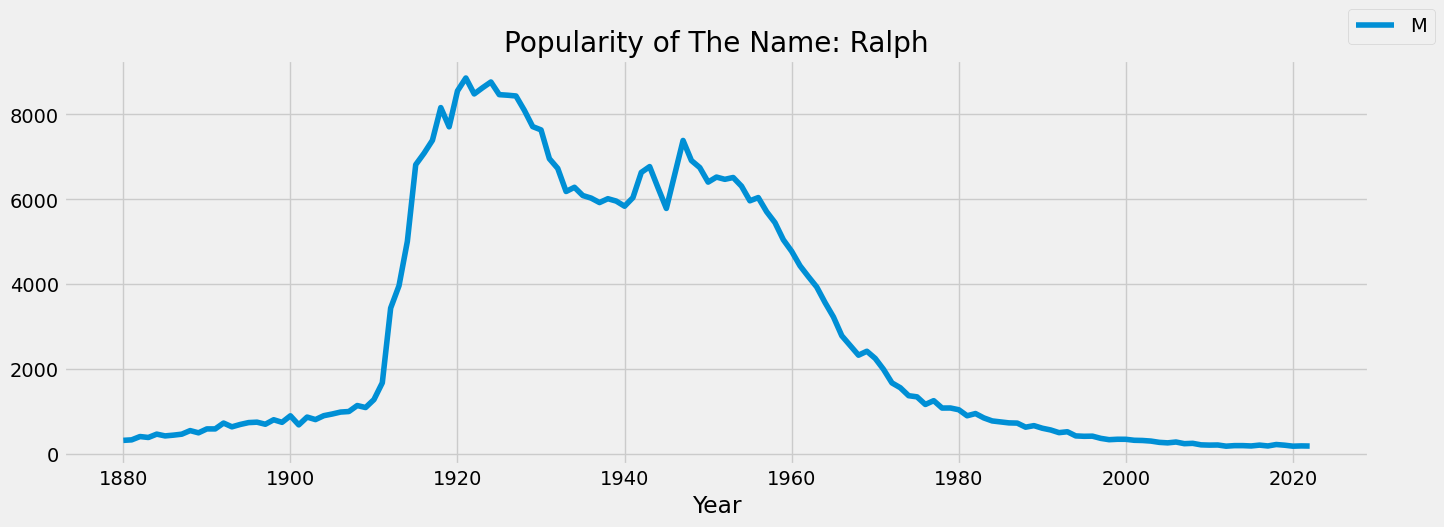

In [9]:
plot_name(df, 'Ralph', genders=['M'])

In [10]:
df.query('Name == "Denaerys"')

,Name,Sex,Count,Year


In [11]:
#df.sort_values('Count')

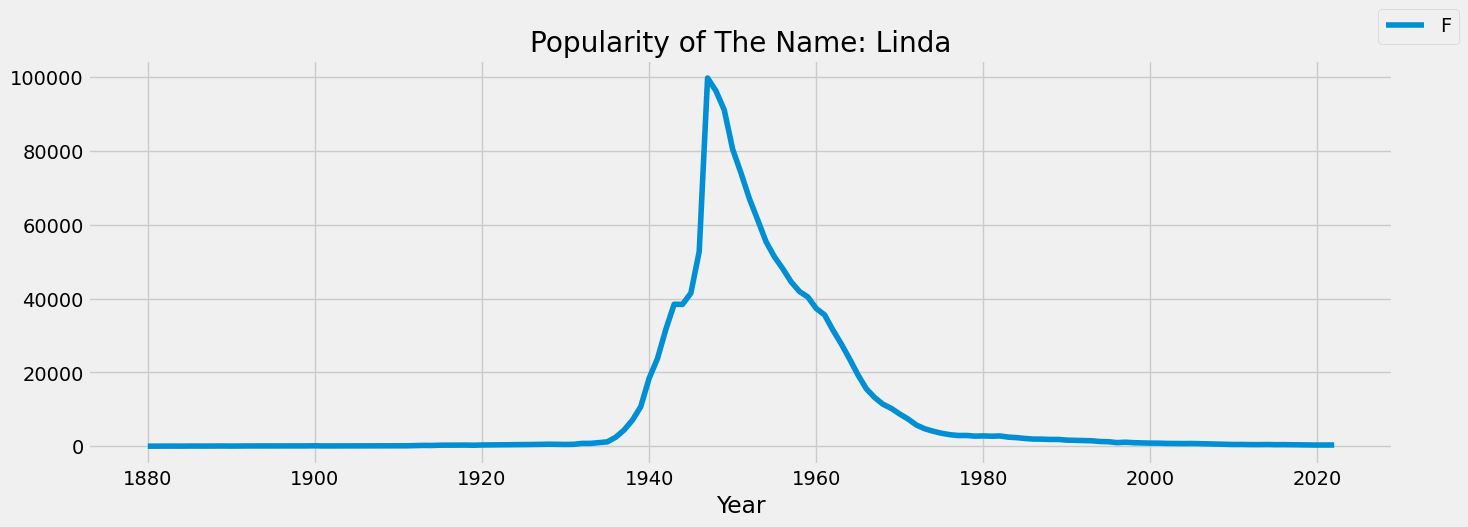

In [12]:
plot_name(df, 'Linda', genders=['F'])

### Peak Linda??

In [13]:
df.query('Name == "Linda"').sort_values('Count', ascending=False).head()

,Name,Sex,Count,Year
0,Linda,F,99693,1947
0,Linda,F,96215,1948
0,Linda,F,91017,1949
0,Linda,F,80431,1950
0,Linda,F,73981,1951


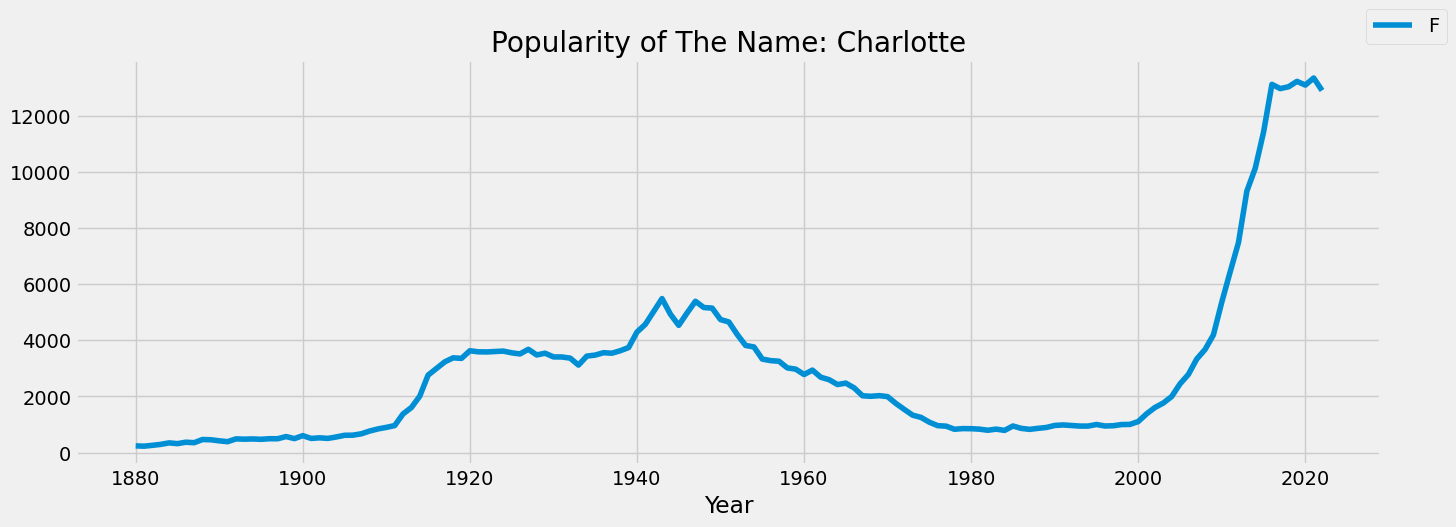

In [14]:
plot_name(df, 'Charlotte', genders=['F'])

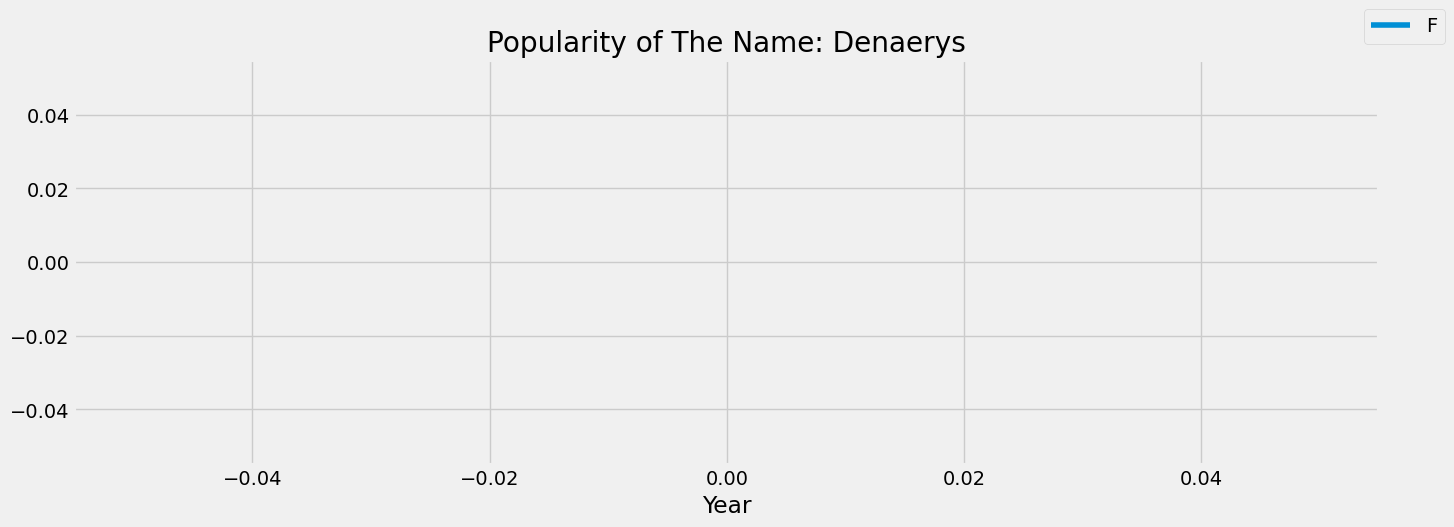

In [15]:
plot_name(df, 'Denaerys', genders=['F'])